<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd

Load the dataset into a dataframe.


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


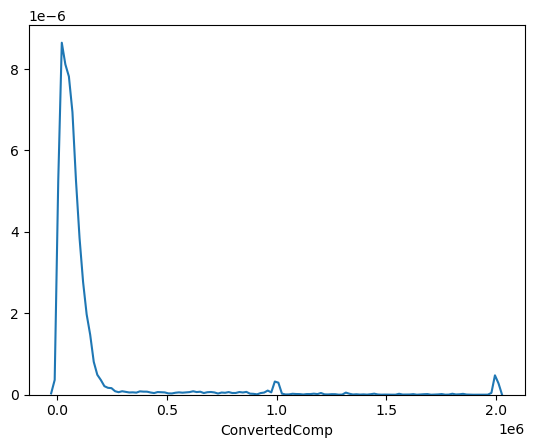

In [7]:
import seaborn as sns
ax = sns.distplot(df['ConvertedComp'], hist=False)


Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

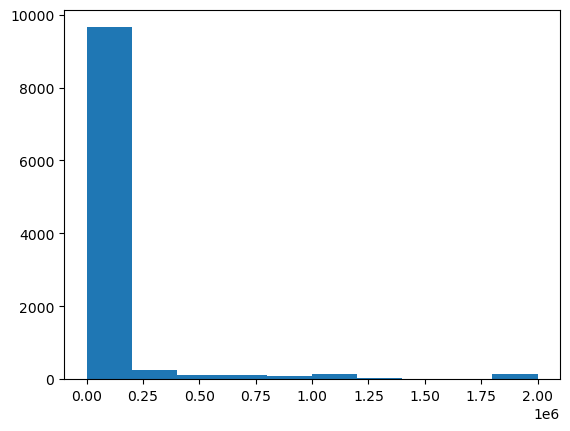

In [8]:
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp'])


What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
# your code goes here
import numpy as np

# Calculate the five-number summary for the 'Age' column
min_age = np.min(df['Age'])
q1_age = np.percentile(df['Age'], 25)
median_age = np.median(df['Age'])  # Calculate the median manually
q3_age = np.percentile(df['Age'], 75)
max_age = np.max(df['Age'])

# Print the result
print(f"Minimum Age: {min_age}")
print(f"Median Age: {median_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 16.0
Median Age: nan
Maximum Age: 99.0


Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

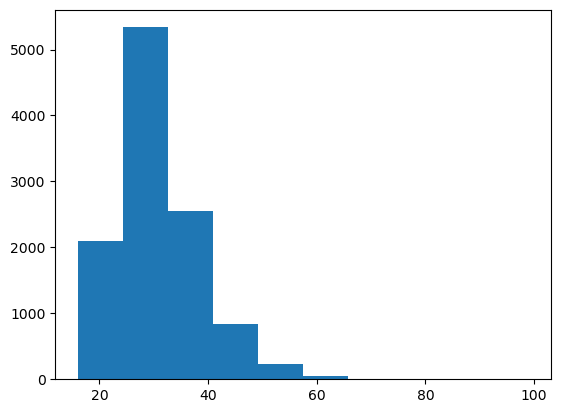

In [12]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


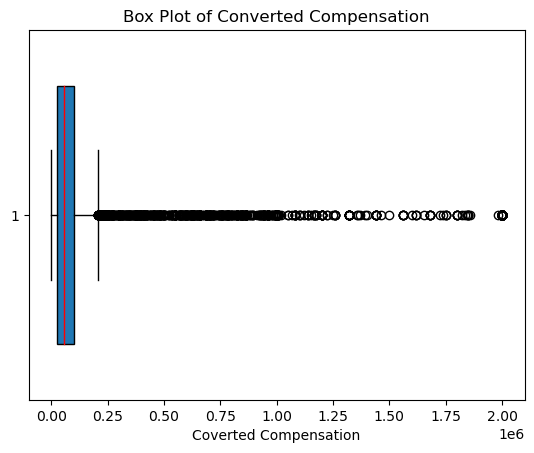

In [23]:
df = df.dropna(subset=['ConvertedComp'])
# your code goes here

plt.boxplot(df['ConvertedComp'],vert=False, widths= 0.7, patch_artist=True, medianprops={'color': 'red'})
plt.xlabel('Coverted Compensation')
plt.title('Box Plot of Converted Compensation')                                                                                     
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [29]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = np.percentile(df['ConvertedComp'], 25)
q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print(f"Interquartile Range (IQR): {iqr}")

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [30]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = np.percentile(df['ConvertedComp'], 25)
q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the upper and lower bounds for outliers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Lower Bound for Outliers: {lower_bound}")

Upper Bound for Outliers: 209698.0
Lower Bound for Outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [31]:
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = np.percentile(df['ConvertedComp'], 25)
q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the upper and lower bounds for outliers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

# Identify outliers in the 'ConvertedComp' column
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print(f"Number of Outliers in ConvertedComp: {num_outliers}")

Number of Outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [32]:
# your code goes here
import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = np.percentile(df['ConvertedComp'], 25)
q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the upper and lower bounds for outliers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

# Create a new DataFrame by removing outliers
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame without outliers
print(filtered_df)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [34]:
# your code goes here
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the correlation between 'Age' and all other numerical columns
age_correlations = correlation_matrix['Age']

# Display the correlation values
print(age_correlations)

Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
